# **Práctica 7: Algoritmos de Grafos. Parte 2**

## **Nodos**

In [10]:
import random
import matplotlib.pyplot as plt

class Node:
    to = 0
    cost = 0
    nxt = None
    # DFS attributes
    prev = None
    color = 0
    distance = -1
    final = -1
    ide = 0

## **Algoritmo**

In [11]:
class Graph:
    time = 0
    
    def __init__(self, numNodes, numEdges, directed, cost): # ---- Constructor ----
        self.edges = []
        self.grade = []
        self.numNodes = numNodes
        self.numEdges = numEdges
        self.directed = True if directed == 1 else False
        self.hasCost = True if cost == 1 else False
        
        i = 0
        while i <= self.numNodes:
            self.grade.append(0)
            self.edges.append(None)
            i += 1
    
    def insert_edge(self, intU, intV, intCost, isDirected): # ---- Insertar Aristas ----
        item = Node()
        item.cost = intCost
        item.to = intV
        item.nxt = self.edges [intU]

        self.edges [intU] = item
        self.grade [intU] += 1

        if isDirected == False and intV != intU:
            self.insert_edge(intV, intU, intCost, True)

    def read_edges (self): # ---- Colocar Aristas ----
        i = 1
        while i <= self.numEdges:
            u = int (input ('u: ') )
            v = int (input ('v: '))

            if self.hasCost == True:
                cost = input ('Cost / weight: ')
            else:
                cost = 1

            self.insert_edge(u, v, cost, self.directed)
            i += 1
    
    def print(self): # ---- Ver Grafo ----
        if self.numNodes == 0:
            print("El grafo está vacío.")
            return
            
        string = ""
        for i in range(1, self.numNodes + 1):
            string += "[" + str(i) + "] -> "
            item = self.edges[i]
            if item is None:
                string += " (sin conexiones)"
            while item is not None:
                string += "[" + str(item.to) + "] "
                item = item.nxt
            string += "\n"
        print(string)
    
    def binary_tree(self): # ---- Árbol Binario ----
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(2, self.numNodes + 1):
            if edges_added >= self.numEdges: break
            parent = i // 2
            self.insert_edge(parent, i, 1, self.directed)
            edges_added += 1

    def star(self): # ---- Estrella ----
        if self.numNodes < 2: return
        edges_added = 0
        centro = 1
        for i in range(2, self.numNodes + 1):
            if edges_added >= self.numEdges: break
            self.insert_edge(centro, i, 1, self.directed)
            edges_added += 1

    def complete(self): # ---- Completo ----
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(1, self.numNodes + 1):
            for j in range(i + 1, self.numNodes + 1):
                if edges_added >= self.numEdges: return
                self.insert_edge(i, j, 1, self.directed)
                edges_added += 1

    def random(self): # ---- Aleatorio ----
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(1, self.numNodes + 1):
            for j in range(i + 1, self.numNodes + 1):
                if edges_added >= self.numEdges: return
                if random.randint(0, 1):
                    self.insert_edge(i, j, 1, self.directed)
                    edges_added += 1
        return edges_added
    
    def depth_first_search(self, intSource):                            # Temporal          # Espacial
        time, space = 0, 0
        i = 1                                                           # 3                 # 2
        time += 1
        space += 1
        while i <= self.numNodes:                                       # 5V                # 2V
            if self.edges[i] != None:                                   # 6V                # 1V
                if self.edges[i].color == 0:                            # 7V                # 1V
                    time, space = self.dfs_visit(i, time, space)        # 3V+32A+52         # 1V+8V+16
            i += 1                                                      # 5V                # 2V
        return time, space                                              # 26V+32A+55        # 15V+18 <-- Gen
    
    def dfs_visit(self, u, time, space):                                # 32A+52            # 8V+16
        time += 1
        space += 1

        self.edges[u].color = 1                                         # 6                 # 2
        self.time += 1                                                  # 6                 # 2
        self.edges[u].distance = self.time                              # 7                 # 2
        self.edges[u].ide = u                                           # 6                 # 2

        v = self.edges[u]                                               # 4                 # 2
        while v != None:                                                # 4                 # 1V
            time += 1
            if self.edges[v.to] != None:                                # 8A                # 1V
                if self.edges[v.to].color == 0:                         # 8A                # 1V
                    self.edges[v.to].prev = self.edges[u]               # 8A                # 2V
                    time, space = self.dfs_visit(v.to, time, space)     # 4A+32A+52         # 1V+8V+16
            v = v.nxt                                                   # 4A                # 2V

        self.edges[u].color = 2                                         # 6                 # 2
        self.time += 1                                                  # 6                 # 2
        self.edges[u].final = self.time                                 # 7                 # 2
        return time, space                          
                                                    # Mejor Caso:       = 55                = 18 <--- Con un grafo de nodos aislados. 
                                                    # Peor Caso:        = 32A+26V^2+55      = 8V+16 <--- Con un grafo completo. 
                                                    # Caso Prom:        = 16A+13n^2+27      = 4V+8 <--- Con un grafo aleatorio. Basado en un grafo completo pero aleatoriamente decidiendo si formará o no algunos enlaces. 
                                                    #                                           Justificación en el reporte.

    def print_dfs_tree(self, intSource):
        children = {i: [] for i in range(1, self.numNodes + 1)}
        
        for i in range(1, self.numNodes + 1):
            if self.edges[i] is not None and self.edges[i].prev is not None:
                parent_index = self.edges[i].prev.ide if hasattr(self.edges[i].prev, 'ide') else None
                if parent_index is not None:
                    children[parent_index].append(i)
        
        def print_recursive(node_index, prefix=""):
            node_children = children.get(node_index, [])
            for i, child_index in enumerate(node_children):
                is_last = (i == len(node_children) - 1)
                connector = "└── " if is_last else "├── "
                print(prefix + connector + str(child_index))
                new_prefix = prefix + ("    " if is_last else "│   ")
                print_recursive(child_index, new_prefix)
        
        print(intSource)
        print_recursive(intSource)

## **Prueba**

In [12]:
g = Graph(7, 6, 0, 0)
g.binary_tree()
g.print()
g.depth_first_search(1)
g.print_dfs_tree(1)
#          1
#        /  \
#       /    \
#      2      3
#    / \     / \
#   /   \   /   \
#  4    5  6     7

[1] -> [3] [2] 
[2] -> [5] [4] [1] 
[3] -> [7] [6] [1] 
[4] -> [2] 
[5] -> [2] 
[6] -> [3] 
[7] -> [3] 

1
├── 2
│   ├── 4
│   └── 5
└── 3
    ├── 6
    └── 7


## **Mejor Caso**

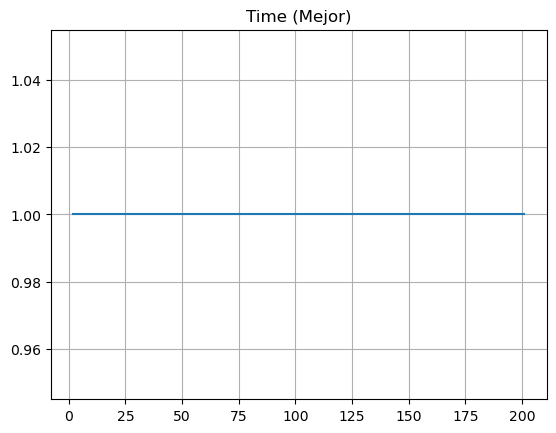

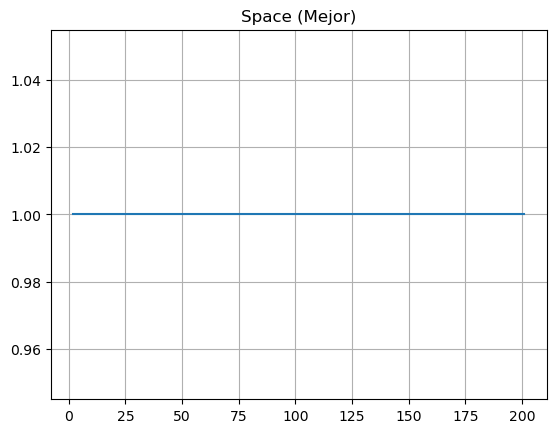

In [13]:
MAX = 200

x = []
y_time = []
y_space = []

for i in range(2, MAX + 2):
    g = Graph(i, 0, 0, 0)
    time, space = g.depth_first_search(1)
    x.append(i)
    y_time.append(time)
    y_space.append(space)

plt.title("Time (Mejor)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Mejor)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_mejor = y_time, y_space

## **Peor Caso**

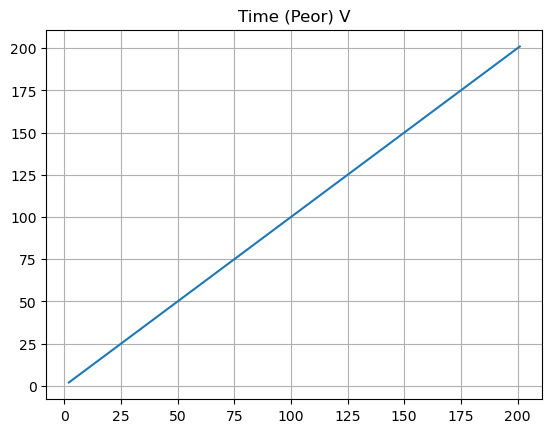

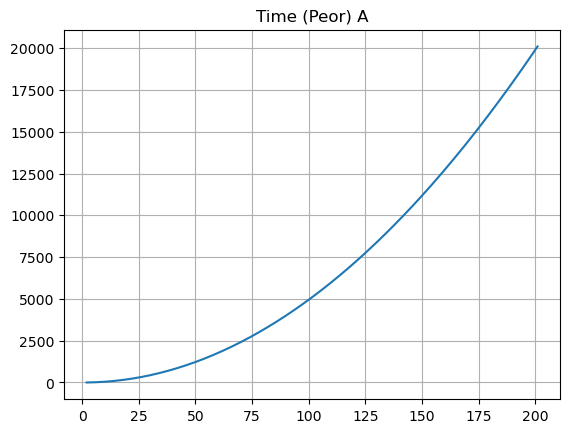

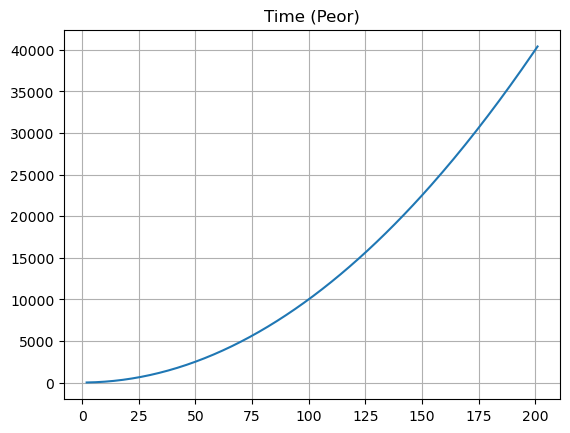

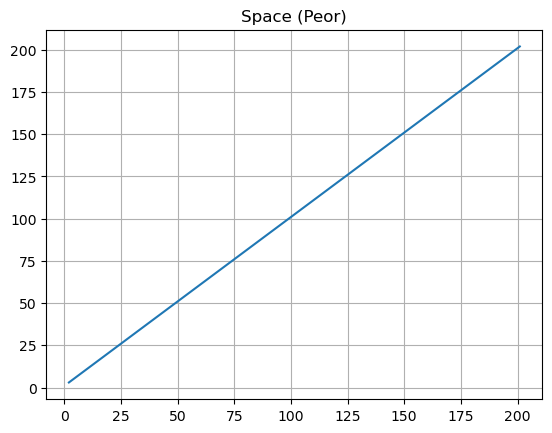

In [14]:
MAX = 200

x = []
y_time = []
y_space = []
y_V = []
y_A = []

for i in range(2, MAX + 2):
    g = Graph(i, (i * (i - 1)) // 2, 0, 0)
    g.complete()
    time, space = g.depth_first_search(1)
    x.append(i)
    y_V.append(i)
    y_A.append((i * (i - 1)) // 2)
    y_time.append(time)
    y_space.append(space)

plt.title("Time (Peor) V")
plt.plot(x, y_V)
plt.grid(1)
plt.show()

plt.title("Time (Peor) A")
plt.plot(x, y_A)
plt.grid(1)
plt.show()

plt.title("Time (Peor)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Peor)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_peor = y_time, y_space

## **Caso Promedio**

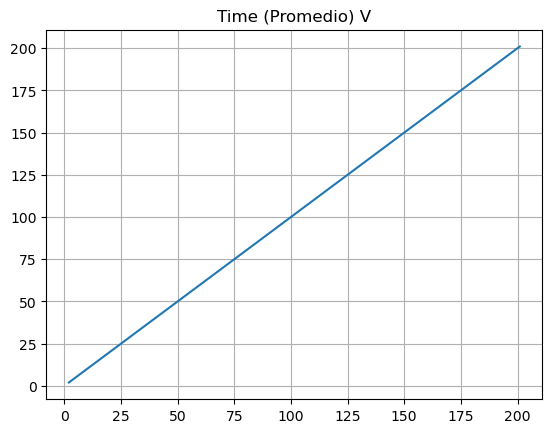

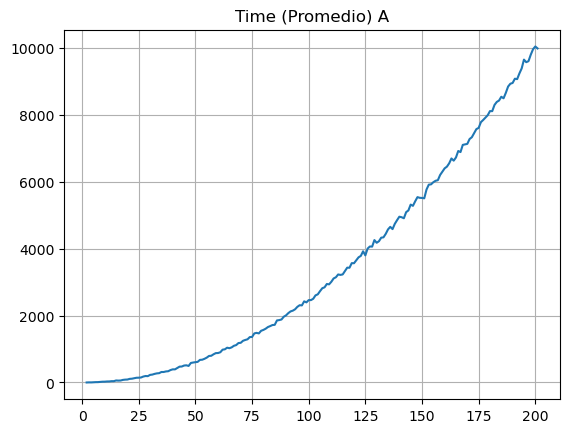

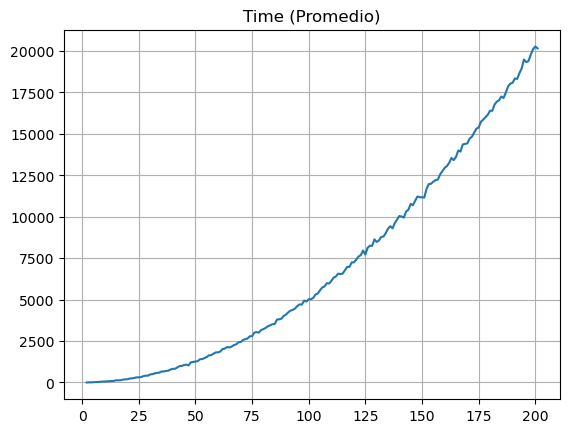

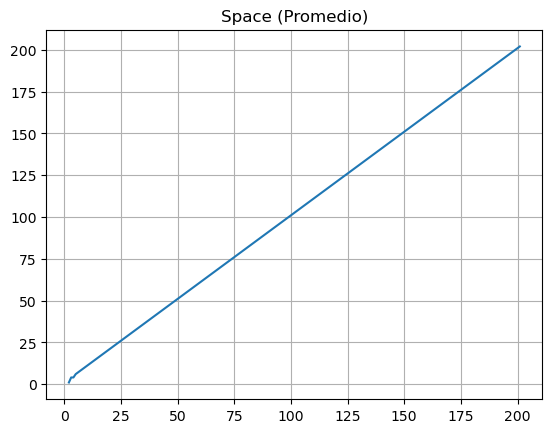

In [17]:
MAX = 200

x = []
y_time = []
y_space = []
y_V = []
y_A = []

for i in range(2, MAX + 2):
    g = Graph(i, (i * (i - 1)) // 2, 0, 0)
    A = g.random()
    time, space = g.depth_first_search(1)
    x.append(i)
    y_V.append(i)
    y_A.append(A)
    y_time.append(time)
    y_space.append(space)

plt.title("Time (Promedio) V")
plt.plot(x, y_V)
plt.grid(1)
plt.show()

plt.title("Time (Promedio) A")
plt.plot(x, y_A)
plt.grid(1)
plt.show()

plt.title("Time (Promedio)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Promedio)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_promedio = y_time, y_space

## **Comparativa**

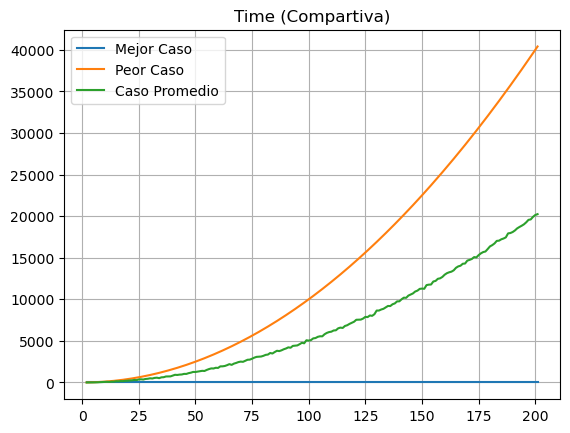

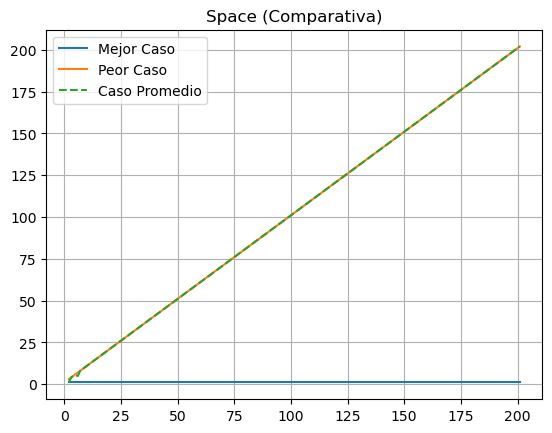

In [16]:
plt.title("Time (Compartiva)")
plt.plot(x, y_mejor[0], label="Mejor Caso")
plt.plot(x, y_peor[0], label="Peor Caso")
plt.plot(x, y_promedio[0], label="Caso Promedio")
plt.legend()
plt.grid(1)
plt.show()

plt.title("Space (Comparativa)")
plt.plot(x, y_mejor[1], label="Mejor Caso")
plt.plot(x, y_peor[1], label="Peor Caso")
plt.plot(x, y_promedio[1], label="Caso Promedio", linestyle="--")
plt.legend()
plt.grid(1)
plt.show()